In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("KBY_18-Nov-2022 00:37:32_session_data.csv")
df

,Trial,brightness-0,brightness-10,brightness-20,brightness-30,brightness-40,brightness-50,brightness-60,brightness-70,brightness-80,brightness-90
0,Gray-0,0,0,16,19,20,20,20,20,20,20
1,Gray-40,0,0,0,14,18,20,20,20,19,20
2,Gray-80,1,0,3,12,11,19,20,20,20,20
3,Gray-120,0,0,0,1,10,18,19,20,20,20
4,Gray-160,1,1,1,2,14,15,17,18,19,20
5,R-80,0,0,0,0,11,18,20,20,20,20
6,R-120,0,0,0,1,3,13,16,18,19,20
7,G-80,0,0,1,8,13,16,19,20,19,20
8,G-120,0,0,1,2,6,13,19,19,20,20
9,B-80,0,0,1,1,4,18,18,19,20,19


In [3]:
data = {}
for c in df['Trial']:
    temp = df[df.Trial == c].values[0]
    data[temp[0]] = temp[1:]
data

{'Gray-0': array([0, 0, 16, 19, 20, 20, 20, 20, 20, 20], dtype=object),
 'Gray-40': array([0, 0, 0, 14, 18, 20, 20, 20, 19, 20], dtype=object),
 'Gray-80': array([1, 0, 3, 12, 11, 19, 20, 20, 20, 20], dtype=object),
 'Gray-120': array([0, 0, 0, 1, 10, 18, 19, 20, 20, 20], dtype=object),
 'Gray-160': array([1, 1, 1, 2, 14, 15, 17, 18, 19, 20], dtype=object),
 'R-80': array([0, 0, 0, 0, 11, 18, 20, 20, 20, 20], dtype=object),
 'R-120': array([0, 0, 0, 1, 3, 13, 16, 18, 19, 20], dtype=object),
 'G-80': array([0, 0, 1, 8, 13, 16, 19, 20, 19, 20], dtype=object),
 'G-120': array([0, 0, 1, 2, 6, 13, 19, 19, 20, 20], dtype=object),
 'B-80': array([0, 0, 1, 1, 4, 18, 18, 19, 20, 19], dtype=object),
 'B-120': array([0, 0, 0, 0, 1, 1, 13, 19, 20, 20], dtype=object),
 'Rel-80-40': array([0, 0, 0, 1, 2, 4, 16, 18, 19, 20], dtype=object),
 'Rel-80-50': array([0, 0, 1, 1, 0, 3, 9, 10, 15, 20], dtype=object),
 'Rel-120-40': array([0, 0, 0, 0, 3, 5, 5, 16, 20, 19], dtype=object),
 'Rel-120-50': array([

In [4]:
df = pd.DataFrame.from_dict(data, orient='index').T
df.head()

,Gray-0,Gray-40,Gray-80,Gray-120,Gray-160,R-80,R-120,G-80,G-120,B-80,B-120,Rel-80-40,Rel-80-50,Rel-120-40,Rel-120-50
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,16,0,3,0,1,0,0,1,1,1,0,0,1,0,0
3,19,14,12,1,2,0,1,8,2,1,0,1,1,0,0
4,20,18,11,10,14,11,3,13,6,4,1,2,0,3,0


### Helper: Sigmoid

In [5]:
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

def do_sigmoid(xdata, ydata):
    p0 = [max(ydata), np.median(xdata), 1, min(ydata)]

    popt, pcov = curve_fit(sigmoid, xdata, ydata, p0, method='dogbox')

    x = np.linspace(0, 90, 1000)
    return sigmoid(x, *popt)

# Distance Analysis

Text(0, 0.5, 'Percentage of Reported Seen')

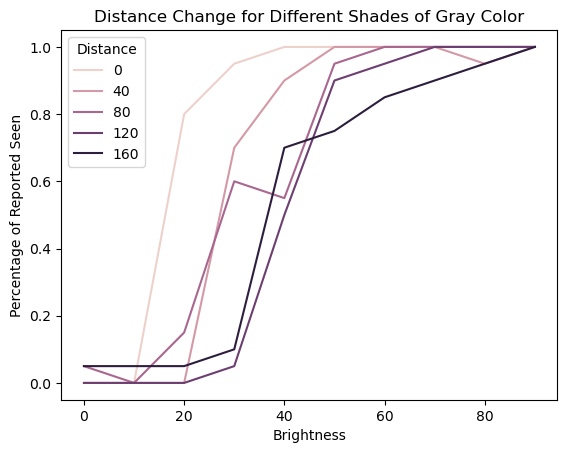

In [6]:
grays = pd.DataFrame()
dists, bris, scores = [], [], []
for i in range(len(df)):
    for j in range(5):
        dists.append(j*40)
        bris.append(i*10)
        scores.append(df['Gray-'+str(j*40)][i]/20)
grays['Distance'] = dists
grays['Brightness'] = bris
grays['Score'] = scores

sns.lineplot(data = grays, x = 'Brightness', y = 'Score', hue = 'Distance')
plt.title('Distance Change for Different Shades of Gray Color')
plt.ylabel('Percentage of Reported Seen')

/tmp/ipykernel_26853/2894644830.py:4: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


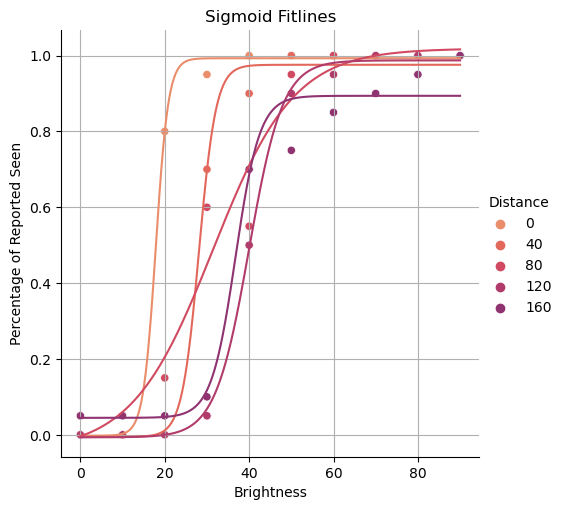

In [7]:
xdata = list(range(0,91,10))
xplot = np.linspace(0, 90, 1000)

colors = sns.color_palette("flare")
thresholds = []

sns.relplot(data = grays, x = 'Brightness', y = 'Score', hue = 'Distance', palette = colors[:5])
for j, i in enumerate(['Gray-0', 'Gray-40', 'Gray-80', 'Gray-120', 'Gray-160']):
    ydata = df[i]/20
    ys = do_sigmoid(xdata, ydata)
    threshold = xplot[np.where(ys == [i for i in ys if 0.490 < i < 0.510][0])]
    thresholds.append(threshold)
    plt.plot(xplot, ys, color = colors[j])
plt.title('Sigmoid Fitlines')
plt.ylabel('Percentage of Reported Seen')
plt.grid()

In [96]:
thresholds

[array([17.92792793]),
 array([28.1981982]),
 array([31.53153153]),
 array([40.]),
 array([37.11711712])]

Text(0, 0.5, 'Calculated Absolute Threshold')

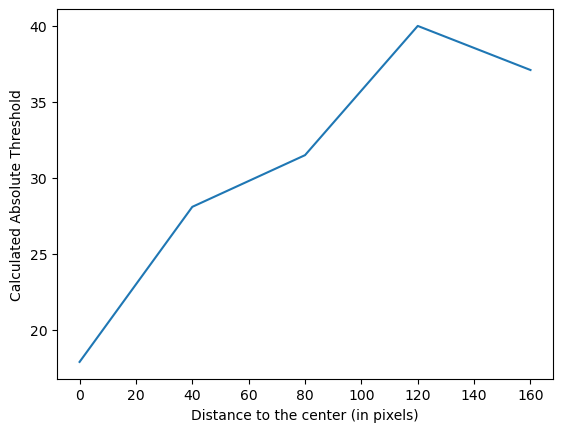

In [2]:
y = [17.9,
28.1,
31.5,
40.0,
37.1]
x = [0,40,80,120,160]

plt.plot(x,y)
plt.xlabel('Distance to the center (in pixels)')
plt.ylabel('Calculated Absolute Threshold')

# RGB Analysis

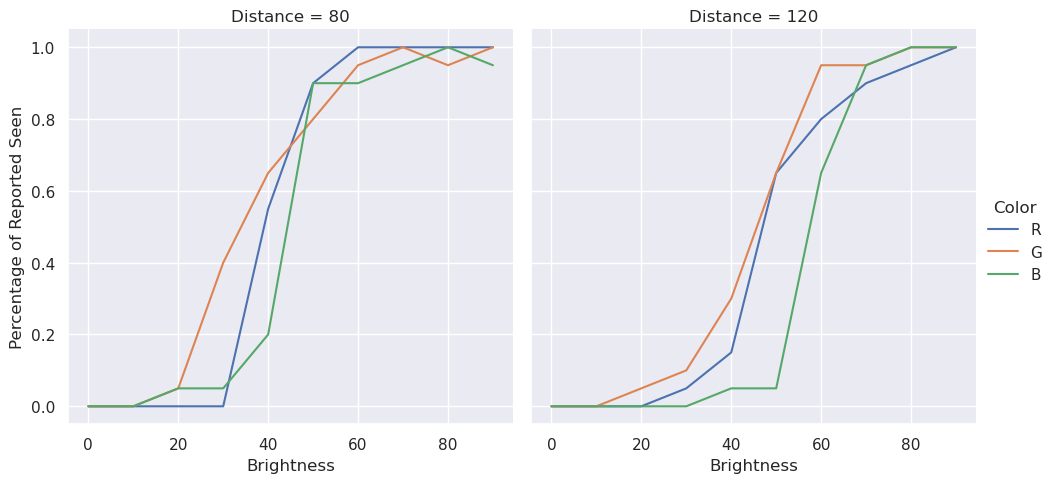

In [6]:
sns.set_theme()
rgb = pd.DataFrame()
dists, bris, colors, scores = [], [], [], []
for i in range(len(df)):
    for c in [i+j for i in ['R-', 'G-', 'B-'] for j in ['80', '120']]:
        dists.append(int(c.split('-')[1]))
        bris.append(i*10)
        colors.append(c.split('-')[0])
        scores.append(df[c][i]/20)
rgb['Color'] = colors
rgb['Distance'] = dists
rgb['Brightness'] = bris
rgb['Percentage of Reported Seen'] = scores

sns.relplot(data = rgb, x = 'Brightness', y = 'Percentage of Reported Seen', hue = 'Color', 
            col = 'Distance', kind = 'line')

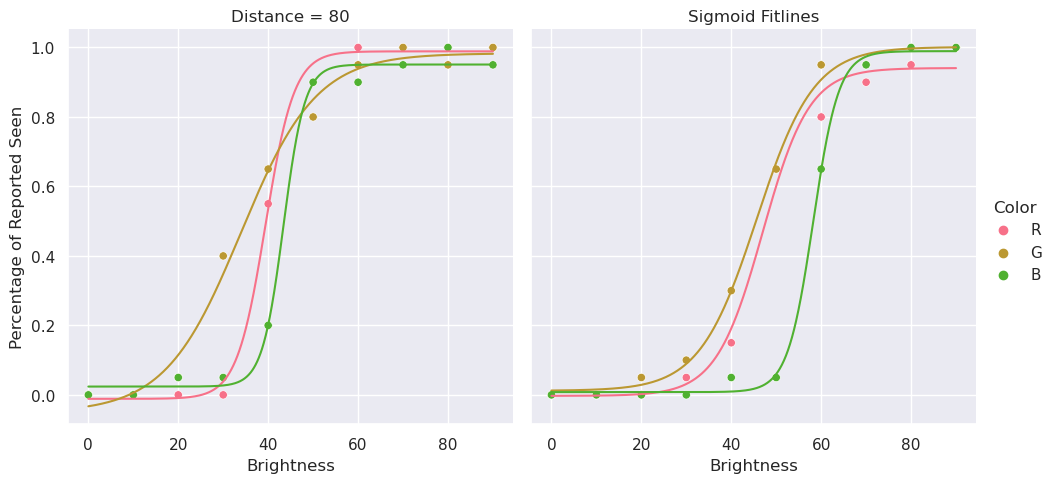

In [27]:
xdata = list(range(0,91,10))
xplot = np.linspace(0, 90, 1000)

colors = sns.color_palette("husl")
thresholds = []

sns.relplot(data = rgb, x = 'Brightness', y = 'Percentage of Reported Seen', hue = 'Color', 
            col = 'Distance', palette = colors[:3])
for j, i in enumerate(['R-80', 'R-120', 'G-80' ,'G-120', 'B-80','B-120']):
    ydata = df[i]/20
    ys = do_sigmoid(xdata, ydata)
    threshold = xplot[np.where(ys == [i for i in ys if 0.490 < i < 0.510][0])]
    thresholds.append(threshold)
    ax = plt.gcf().get_axes()[j % 2]
    ax.plot(xplot, ys, color = colors[int((j-j%2)/2)])
plt.title('Sigmoid Fitlines')
plt.ylabel('Percentage of Reported Seen')
plt.show()

In [28]:
thresholds

[array([39.45945946]),
 array([47.47747748]),
 array([34.77477477]),
 array([45.31531532]),
 array([43.51351351]),
 array([58.1981982])]

In [49]:
y1 = [34.7,39.4,43.5,45.3,47.4,58.1]
y2 = [45.3,47.4,58.1]

tmp = pd.DataFrame()
tmp['Channel'] = ['G', 'R', 'B', 'G', 'R', 'B']
tmp['Threshold'] = y1
tmp['Distance'] = [80, 80, 80, 120, 120, 120]
tmp

,Channel,Threshold,Distance
0,G,34.7,80
1,R,39.4,80
2,B,43.5,80
3,G,45.3,120
4,R,47.4,120
5,B,58.1,120


In [50]:
fig = px.scatter(tmp, x = "Distance", y = "Threshold", color = "Channel", size = 'Distance',
                 color_discrete_map = {'R':'#bf0000', 'G':'#3dbf00', 'B':'#001abf'})
fig.show()

# Relative Thresholds

# Sigmoid

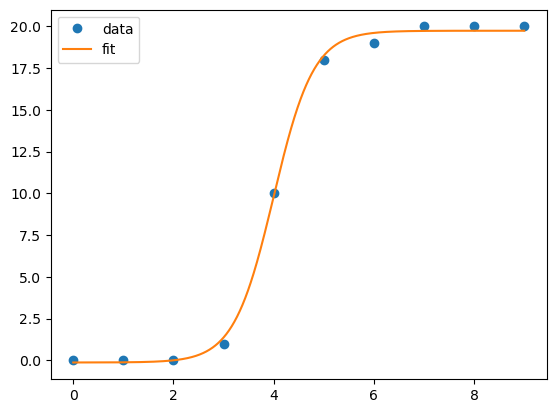

In [31]:
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

tmp = df.iloc[:, :5]
xdata = tmp.index
ydata = tmp['Gray-120']

p0 = [max(ydata), np.median(xdata), 1, min(ydata)]

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')

x = np.linspace(0, 9, 1000)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='fit')
plt.legend(loc='best')